In [2]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Step 2: Load the dataset
cust_data = pd.read_csv('Mall_Customers.csv')

In [4]:
# Step 3: Basic data exploration
print(cust_data.info())
print(cust_data.describe())
print(cust_data['Gender'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

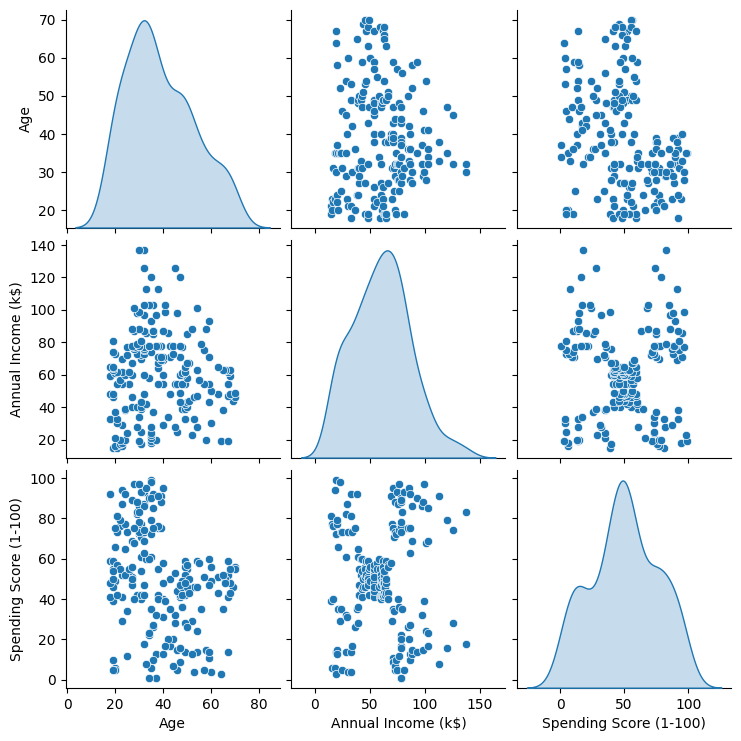

In [5]:
# Step 4: Visualize feature distributions
sns.pairplot(cust_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.show()

In [6]:
# Step 5: Encode categorical variables (Gender)
cust_data['Gender'] = cust_data['Gender'].map({'Male': 0, 'Female': 1})

In [7]:
# Step 6: Select features for clustering (including Age, Income, Spending Score, Gender)
X = cust_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]

In [8]:
# Step 7: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Step 8: Determine optimal number of clusters using the Elbow method and Silhouette score
wcss = []
silhouette_scores = []
cluster_range = range(2, 11)

In [10]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    preds = kmeans.predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, preds))

Text(0, 0.5, 'WCSS')

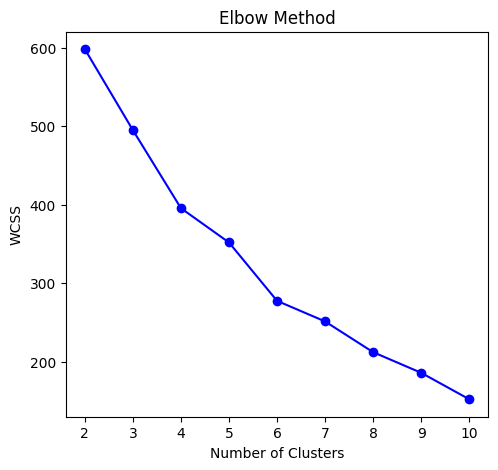

In [11]:
# Plot Elbow Method
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(cluster_range, wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

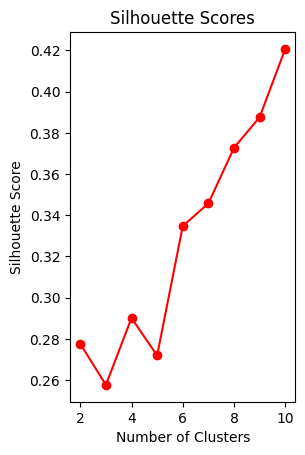

In [12]:
# Plot Silhouette Scores
plt.subplot(1,2,2)
plt.plot(cluster_range, silhouette_scores, 'ro-')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [13]:
# Step 9: Train final KMeans model
optimal_clusters = 7  # Choose based on elbow & silhouette graphs
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

In [14]:
# Step 10: Assign cluster labels to original data
cust_data['Cluster'] = cluster_labels

In [15]:
# Step 11: Cluster profiling - summarizing segment characteristics
print(cust_data.groupby('Cluster').mean())

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         71.653846  0.000000  58.846154           48.692308   
1        161.105263  0.000000  38.473684           85.894737   
2         95.900000  0.000000  28.575000           57.375000   
3        166.434783  0.913043  32.086957           90.000000   
4         63.352941  1.000000  25.705882           44.352941   
5         22.857143  0.928571  41.214286           26.071429   
6        114.500000  1.000000  49.477273           67.636364   

         Spending Score (1-100)  
Cluster                          
0                     39.846154  
1                     14.210526  
2                     69.825000  
3                     81.391304  
4                     60.147059  
5                     20.142857  
6                     39.590909  


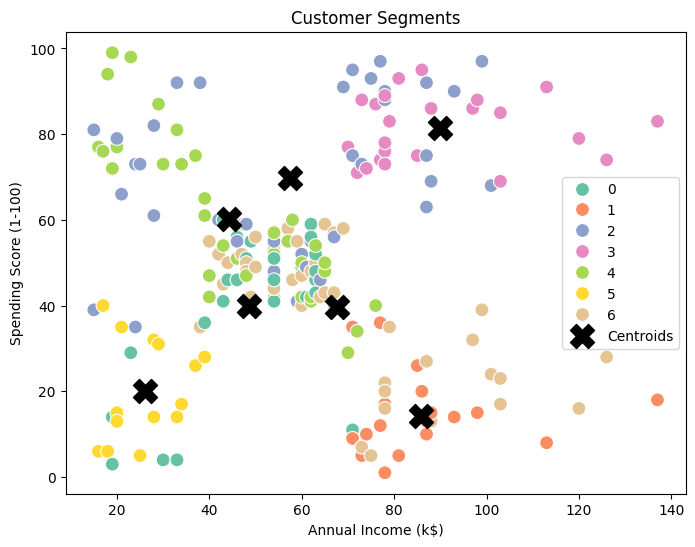

In [16]:
# Step 12: Visualize clusters on 2D scatter plots (Income vs Spending Score)
plt.figure(figsize=(8,6))
sns.scatterplot(data=cust_data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:,1], scaler.inverse_transform(kmeans.cluster_centers_)[:,2], s=300, c='black', marker='X', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Age Cluster Profiling

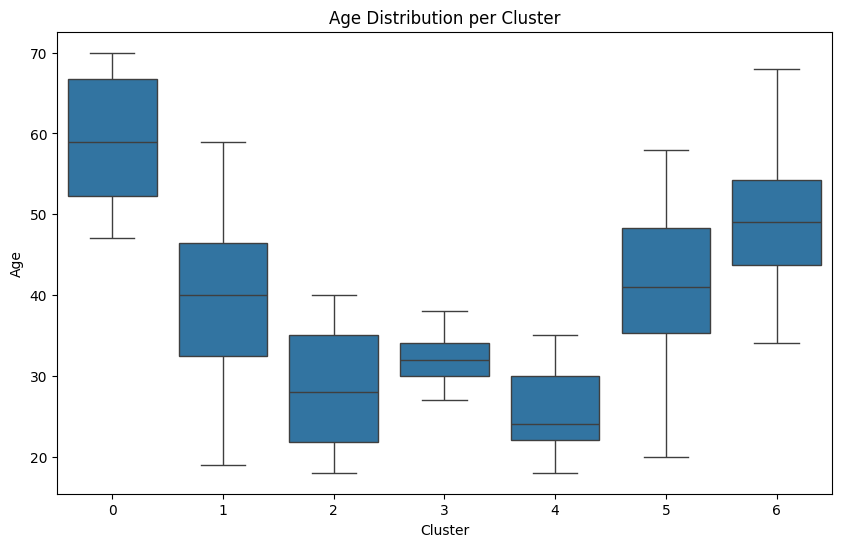

In [17]:
# Visualize Age distribution per cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=cust_data)
plt.title('Age Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

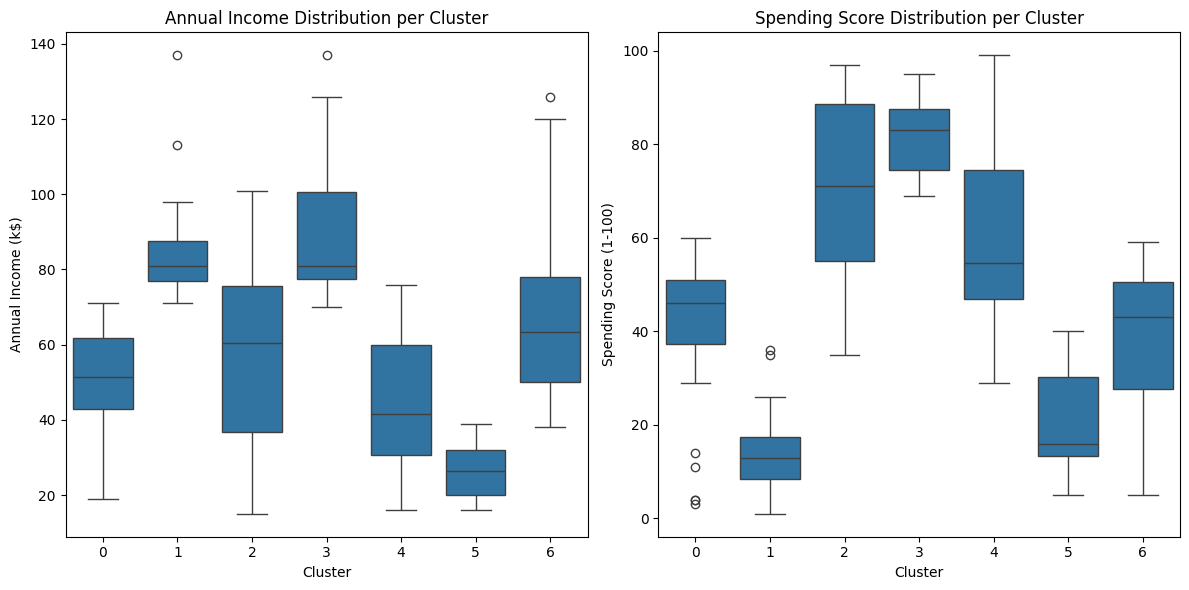

In [19]:
# Visualize Annual Income and Spending Score distribution per cluster
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=cust_data)
plt.title('Annual Income Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Annual Income (k$)')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=cust_data)
plt.title('Spending Score Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

## Analysis Outcome: Customer Segments

Based on the K-Means clustering analysis using Age, Annual Income, Spending Score, and Gender, we have identified 7 distinct customer segments:

*   **Cluster 0:** Customers with lower to average income and average spending.
*   **Cluster 1:** Customers with average to higher income but low spending.
*   **Clusters 2, 3, and 4:** Generally younger to middle-aged customers with varying incomes but notably high spending scores. These represent the "high-spending" segments.
*   **Cluster 5:** Customers with lower income and lower spending, potentially including younger or budget-conscious individuals.
*   **Cluster 6:** Customers with average to higher income but low to average spending, typically in a slightly older age range.

These identified segments provide valuable insights for targeted marketing strategies, product offerings, and overall business decisions aimed at better serving the diverse customer base.